## Phase 1: Ask
It is always important to understand what even seems to be the problem or the question. Making an assumption or not understanding fully the problem will lead to wrong conclusions and will result in wrong actions. Identifying the problem is naturally also one of the hardest tasks which will be done in the Ask phase

**Business Task**: - Analyze data usage of one non bellabeat smart device and gain insights from it and apply it to benefit the bellabeat product marketing.

**Key Stakeholders**:

Urška Sršen: Bellabeat’s co founder and Chief Creative Officer

Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team

Bellabeat marketing analytics team

**What is the product I am choosing to compare and with which Non bellabeat smart device?**

Bellabeat leaf  compared with fitbit

**What problem am I trying to solve?**

Gaining insights on one of the non bellabeat product and apply those insights to to influence Bellabeat marketing strategy

**How can my insights drive the business decisions?**
Insights on customer preferences will drive a change in the marketing strategies to drive the business growth.


# Phase 2: Prepare
Once there is an understanding of the problem, one can think about how to solve this. Time to decide what data needs to be collected in order to answer the questions and how to organize it so that it is useful.

**What needs to be figured out how to solve this problem?**
Insights about the usage patterns of the fitbit devices

**Where is the data sourced from and which data?**
Fitbit data available on kaggle
https://www.kaggle.com/arashnic/fitbit

**How is the data organized? Is it in long or wide format?**
Selected subsets  of datasets are in the long format.

**Are there any issues with the bias and credibility in this data? Does your data ROCCC?**
Data is not biased to a particular population as it is taken from a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. No particular bias regarding gender or region found upon superficial inspection. But the time at which the survey was done may create a bias as data for other different seasons/months may have some difference.

Does my data ROCCC?

Reliable:
Check for inaccurate,incomplete or biased data
No NULL data found
No information about the participants of the survey. Bias may be found.
Information sourced from a good source with no superficial inaccuracies found

Original:
This is 3rd party data sourced from kaggle and with citation as Furberg, R., Brinton, J., Keating, M., & Ortiz, A. (2016). Crowd-sourced Fitbit datasets 03.12.2016-05.12.2016 [Data set]. Zenodo. https://doi.org/10.5281/zenodo.53894

Comprehensive:
The given data sets contain information about various parameters like steps, Distance, their intensities, duration with intensities,calories,etc in different granularities like daily and minute wise. Our goal here is to identify usage patterns of the fitbit devices and derive insights from it. The given datasets are able to provide information required to reach our goal and hence they are comprehensive

Current:
The data currently available is a bit outdated but accurate and hence carry forwarding with a bit outdated dataset

Cited:
The datasets are cited as follows:
Furberg, R., Brinton, J., Keating, M., & Ortiz, A. (2016). Crowd-sourced Fitbit datasets 03.12.2016-05.12.2016 [Data set]. Zenodo. https://doi.org/10.5281/zenodo.53894


**Are there any problems with the data?**
The sample size for the weight_log_info is smaller than the actual sample population surveyed and hence the dataset was removed. Also some datasets not in line with the analysis objectives or redundant were removed. After these steps the data is ready for the processing step.


In [9]:
#loading the required libraries
library(tidyverse);
library(skimr);
library(janitor);
library(lubridate);


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




Loading the datasets into R dataframes

In [2]:
daily_activity<-read_csv("dailyActivity_merged.csv")
head(daily_activity)

daily_calories<-read_csv("dailyCalories_merged.csv")
head(daily_calories)

daily_calories<-read_csv("dailyCalories_merged.csv")
head(daily_calories)

daily_intensities<-read_csv("dailyIntensities_merged.csv")
head(daily_intensities)

daily_steps<-read_csv("dailySteps_merged.csv")
head(daily_steps)

heartrate_seconds<-read_csv("heartrate_seconds_merged.csv")
head(heartrate_seconds)

hourly_calories<-read_csv("hourlyCalories_merged.csv")
head(hourly_calories)

hourly_intensities<-read_csv("hourlyIntensities_merged.csv")
head(hourly_intensities)

hourly_steps<-read_csv("hourlySteps_merged.csv")
head(hourly_steps)

minute_calories<-read_csv("minuteCaloriesWide_merged.csv")
head(minute_calories)

minute_intensities<-read_csv("minuteIntensitiesWide_merged.csv")
head(minute_intensities)

minute_mets<-read_csv("minuteMETsNarrow_merged.csv")
head(minute_intensities)

minute_sleep<-read_csv("minuteSleep_merged.csv")
head(minute_sleep)

minute_steps<-read_csv("minuteStepsWide_merged.csv")
head(minute_steps)

sleep_day<-read_csv("sleepDay_merged.csv")
head(sleep_day)

weight_log_info<-read_csv("weightLogInfo_merged.csv")
head(weight_log_info)


Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,ActivityDay,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,1985
1503960366,4/13/2016,1797
1503960366,4/14/2016,1776
1503960366,4/15/2016,1745
1503960366,4/16/2016,1863
1503960366,4/17/2016,1728


Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,ActivityDay,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,1985
1503960366,4/13/2016,1797
1503960366,4/14/2016,1776
1503960366,4/15/2016,1745
1503960366,4/16/2016,1863
1503960366,4/17/2016,1728


Rows: 940 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (9): Id, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, Ve...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,ActivityDay,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,13162
1503960366,4/13/2016,10735
1503960366,4/14/2016,10460
1503960366,4/15/2016,9762
1503960366,4/16/2016,12669
1503960366,4/17/2016,9705


Rows: 2483658 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Time
dbl (2): Id, Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,Time,Value
<dbl>,<chr>,<dbl>
2022484408,4/12/2016 7:21:00 AM,97
2022484408,4/12/2016 7:21:05 AM,102
2022484408,4/12/2016 7:21:10 AM,105
2022484408,4/12/2016 7:21:20 AM,103
2022484408,4/12/2016 7:21:25 AM,101
2022484408,4/12/2016 7:22:05 AM,95


Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,ActivityHour,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59
1503960366,4/12/2016 3:00:00 AM,47
1503960366,4/12/2016 4:00:00 AM,48
1503960366,4/12/2016 5:00:00 AM,48


Rows: 22099 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (3): Id, TotalIntensity, AverageIntensity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,ActivityHour,TotalIntensity,AverageIntensity
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000


Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


Rows: 21645 Columns: 62
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityHour
dbl (61): Id, Calories00, Calories01, Calories02, Calories03, Calories04, Ca...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,ActivityHour,Calories00,Calories01,Calories02,Calories03,Calories04,Calories05,Calories06,Calories07,⋯,Calories50,Calories51,Calories52,Calories53,Calories54,Calories55,Calories56,Calories57,Calories58,Calories59
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/13/2016 12:00:00 AM,1.8876,2.2022,0.9438,0.9438,0.9438,2.0449,0.9438,2.2022,⋯,0.9438,2.0449,2.0449,0.9438,2.3595,1.8876,0.9438,0.9438,0.9438,0.9438
1503960366,4/13/2016 1:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.9438,0.9438,0.9438,0.7865,⋯,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
1503960366,4/13/2016 2:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,⋯,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
1503960366,4/13/2016 3:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,⋯,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
1503960366,4/13/2016 4:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,⋯,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
1503960366,4/13/2016 5:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,⋯,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865


Rows: 21645 Columns: 62
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityHour
dbl (61): Id, Intensity00, Intensity01, Intensity02, Intensity03, Intensity0...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,ActivityHour,Intensity00,Intensity01,Intensity02,Intensity03,Intensity04,Intensity05,Intensity06,Intensity07,⋯,Intensity50,Intensity51,Intensity52,Intensity53,Intensity54,Intensity55,Intensity56,Intensity57,Intensity58,Intensity59
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/13/2016 12:00:00 AM,1,1,0,0,0,1,0,1,⋯,0,1,1,0,1,1,0,0,0,0
1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1503960366,4/13/2016 5:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Rows: 1325580 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityMinute
dbl (2): Id, METs

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,ActivityHour,Intensity00,Intensity01,Intensity02,Intensity03,Intensity04,Intensity05,Intensity06,Intensity07,⋯,Intensity50,Intensity51,Intensity52,Intensity53,Intensity54,Intensity55,Intensity56,Intensity57,Intensity58,Intensity59
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/13/2016 12:00:00 AM,1,1,0,0,0,1,0,1,⋯,0,1,1,0,1,1,0,0,0,0
1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1503960366,4/13/2016 5:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Rows: 188521 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): date
dbl (3): Id, value, logId

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,date,value,logId
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 2:47:30 AM,3,11380564589
1503960366,4/12/2016 2:48:30 AM,2,11380564589
1503960366,4/12/2016 2:49:30 AM,1,11380564589
1503960366,4/12/2016 2:50:30 AM,1,11380564589
1503960366,4/12/2016 2:51:30 AM,1,11380564589
1503960366,4/12/2016 2:52:30 AM,1,11380564589


Rows: 21645 Columns: 62
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityHour
dbl (61): Id, Steps00, Steps01, Steps02, Steps03, Steps04, Steps05, Steps06,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,⋯,Steps50,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/13/2016 12:00:00 AM,4,16,0,0,0,9,0,17,⋯,0,9,8,0,20,1,0,0,0,0
1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1503960366,4/13/2016 5:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Rows: 67 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (6): Id, WeightKg, WeightPounds, Fat, BMI, LogId
lgl (1): IsManualReport

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


We observe that the daily_calories, daily_intensities and daily_steps dataframes are redundant as the features in them are already covered in the daily_activity dataframe. Also the dataframes containing information in the granularity of minutes and seconds is too fine for our analysis objective. Hence we will remove those dataframes.


In [3]:
remove(daily_calories)
remove(daily_intensities)
remove(daily_steps)
remove(minute_calories)
remove(minute_intensities)
remove(minute_mets)
remove(minute_sleep)
remove(minute_steps)
remove(heartrate_seconds)

Now we will find if the dataframes contains sufficient amount of sample size of the population for the analysis.

In [5]:
n_distinct(daily_activity$Id)
n_distinct(hourly_calories$Id)
n_distinct(hourly_intensities$Id)
n_distinct(hourly_steps$Id)
n_distinct(sleep_day$Id)
n_distinct(weight_log_info$Id)

[1] 33

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

There is information of only 8 people in the weight_log_info datframe and hence we will remove it

In [6]:
remove(weight_log_info)

Cleaning the variable names of all the dataframes using the clean_names function from the janitor library.


In [7]:
all_vars<-ls()
data_frames <- all_vars[sapply(all_vars, function(x) is.data.frame(get(x)))]
for(df_name in data_frames)
{
  dftemp<-get(df_name);
  assign(df_name,clean_names(dftemp))
}
remove(dftemp)

# Phase 3: Process

When we start using the data, it might be a combination from different sources or it might not be of the highest quality. A process known as data cleaning is the fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. What we aim to achieve is clean data.

**What tools are you choosing and why?**

I am choosing R to clean my data because of two primary reasons:
1. My data is quite large so spreadsheets won't work
2. R over MySQL because of the ease at which data can be cleaned in R when compared to MySQL


**Have you ensured your data’s integrity?**

Yes, to ensure data integrity, following data integrity principles were incorporated:

Completeness:

The required measures for the analysis are known. Weight_log_info dataset contained information only about a very small subset of the people out of the sample population surveyed and hence it was removed in the data preparation step.

Validity:

The data is valid in context of the business constraints. In the data preparation, Some datasets not in line with the analysis objectives were removed like the heartrate_seconds which had too much granularity for the analysis, instead datasets like hourly_intensities can give us a measure of the intensities which we would have devised from the heart rates.  

Accuracy:

The data is accurate. It is cited and is from a trustable source.
Consistency: Some inconsistencies in the data types of attributes were found and fixed like the dates and datetime formats which were stored as char were converted to date and datetime data types wherever required

What steps have you taken to ensure that your data is clean?

Following are the steps I have taken to ensure that my data is clean:
1. Fixing Inconsistent data types for the date and datetime columns in many datasets.
2. Checking for null values in datasets
3. Checking for duplicate data in the datasets
4. Checking for typos


**How can you verify that your data is clean and ready to analyze?**

- Sources of errors:

1. Did you use the right tools and functions to find the source of the errors in your dataset?<br>
Yes I used R programming language to check for any anomaly in the dataset

- Null data:
1. Did you search for NULLs?<br>
Yes I searched for the NULLs in the datasets using the is.na() function

- Misspelled words:
1. Did you locate all misspellings?<br>
There are no character or string data types present as attributes to my columns and the column headers are spelled correctly.The column names were made consistent with clean_names() function

- Mistyped numbers:
1. Did you double-check that your numeric data has been entered correctly?<br>
Yes I checked the range of integers to be valid through the skim_without_charts() function to ensure validity of the integers

- Extra spaces and characters:
1. Did you remove any extra spaces or characters?<br>
No string or character data types are present for the trimming of whitespaces

- Duplicates:
1. Did you remove duplicates?<br>
Yes, through the unique() function

- Mismatched data types:
1. Did you check that numeric, date, and string data are typecast correctly?<br>
Yes the data types of the columns in the datasets were verified to be okay.

- Messy (inconsistent) strings:
 No strings present

- Messy (inconsistent) date formats:
1. Did you format the dates consistently throughout your dataset?<br>
Yes, the date and datetime formats were formatted correctly by typecasting the respective column names through the as.Date() for dates and parse_date_time() for datetime data types.

- Misleading variable labels (columns):
1. Did you name your columns meaningfully?<br>
Yes the columns were named meaningfully

- Truncated data:
1. Did you check for truncated or missing data that needs correction?<br>
Yes, a dataset with missing data was found (weight_log_info) and due to a lot of insufficient data the dataset was dropped.

- Business Logic:
1. Did you check that the data makes sense given your knowledge of the business?
<br>The final datasets selected for the analysis process include daily activities, hourly activities and sleep statistics which are relevant to the business task of gaining insight of the usage of the fitness device.
From doing the above check we are sure that the data is ready for analysis

**Have you documented your cleaning process so you can review and share those results?**<br>
Yes, the cleaning process has been documented.


The columns containing dates as well as datetime were having the datatypes as char which can cause problems in the analysis phase. Hence we will make the data types consistent for the respective date and datetime columns.

In [10]:
daily_activity$activity_date<-as.Date(daily_activity$activity_date,"%m/%d/%y")
head(daily_activity)


hourly_calories$activity_hour<-parse_date_time(hourly_calories$activity_hour,"%m/%d/%y %I:%M:%S %p")
head(hourly_calories)

hourly_intensities$activity_hour<-parse_date_time(hourly_intensities$activity_hour,"%m/%d/%y %I:%M:%S %p")
head(hourly_intensities)

hourly_steps$activity_hour<-parse_date_time(hourly_steps$activity_hour,"%m/%d/%y %I:%M:%S %p")
head(hourly_steps)

sleep_day$sleep_day<-as.Date(sleep_day$sleep_day,"%m/%d/%y")
head(sleep_day)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2020-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2020-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2020-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2020-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2020-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2020-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


id,activity_hour,calories
<dbl>,<dttm>,<dbl>
1503960366,2016-04-12 00:00:00,81
1503960366,2016-04-12 01:00:00,61
1503960366,2016-04-12 02:00:00,59
1503960366,2016-04-12 03:00:00,47
1503960366,2016-04-12 04:00:00,48
1503960366,2016-04-12 05:00:00,48


id,activity_hour,total_intensity,average_intensity
<dbl>,<dttm>,<dbl>,<dbl>
1503960366,2016-04-12 00:00:00,20,0.333333
1503960366,2016-04-12 01:00:00,8,0.133333
1503960366,2016-04-12 02:00:00,7,0.116667
1503960366,2016-04-12 03:00:00,0,0.000000
1503960366,2016-04-12 04:00:00,0,0.000000
1503960366,2016-04-12 05:00:00,0,0.000000


id,activity_hour,step_total
<dbl>,<dttm>,<dbl>
1503960366,2016-04-12 00:00:00,373
1503960366,2016-04-12 01:00:00,160
1503960366,2016-04-12 02:00:00,151
1503960366,2016-04-12 03:00:00,0
1503960366,2016-04-12 04:00:00,0
1503960366,2016-04-12 05:00:00,0


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<date>,<dbl>,<dbl>,<dbl>
1503960366,2020-04-12,1,327,346
1503960366,2020-04-13,2,384,407
1503960366,2020-04-15,1,412,442
1503960366,2020-04-16,2,340,367
1503960366,2020-04-17,1,700,712
1503960366,2020-04-19,1,304,320


Checking for NULL values if any

In [12]:
which(is.na(daily_activity))
which(is.na(hourly_calories))
which(is.na(hourly_intensities))
which(is.na(hourly_steps))
which(is.na(sleep_day))


integer(0)

integer(0)

integer(0)

integer(0)

integer(0)

Removing duplicate tuples if any

In [13]:
daily_activity<-unique(daily_activity)
hourly_calories<-unique(hourly_calories)
hourly_intensities<-unique(hourly_intensities)
hourly_steps<-unique(hourly_steps)
sleep_day<-unique(sleep_day)

# Phase 4: Analyze

Next up is to make some conclusions based on the trustable data. Analysis is all about analyzing the data we have collected to draw useful conclusions, make predictions, and drive informed decision-making.

**How did you organize your data to perform analysis on it?**<br>
The data has been stored in different dataframes each having their own unique metrics to be analyzed in R. For the need of analysis new data frames were created and existing data frames were modified to add new attributes   

**Has your data been properly formatted?**<br>
Yes the data frames have consistent formatting with clean names and clean data.

**What surprises did you discover in the data?**<br>
There were many insights discovered from the data. We were able to see a clear difference between the amount of time users devoted to fitness in weekends and weekdays and also some interesting insights on the time at which most of the users are sedentary. One big surprise I found was about the sedentary_minutes attribute when I analyzed it for comparing weekend and weekdays insights. I found that even though the factors like the number of calories burnt and number of steps taken were more on weekends than weekdays, the amount of time users are sedentary are more on weekends as compared to weekdays. This suggests that people may engage in more sedentary activities or have more leisure time during weekends, which can include activities such as watching TV, reading, or spending time at a computer.


**What trends or relationships did you find in the data?**<br>
First talking about the granularity on daily basis:<br>
People tend to spend more time on their fitness, walk more steps,sleep less, walk more distance and burn more calories on weekends as compared to weekdays. However since they presumably do not go to work on weekends we see an increase in the amount of time a user is sedentary.  

Now talking about the granularity on hourly basis:<br>
For the purpose of understanding the user behavior in a day, we divided the day into 4 quarters namely q1,q2,q3 and q4 each of 6 hours from 00:00:00 till 23:00:00 representing the data recorded in each of these time slots.
I did find a regular pattern of usage of the devices with respect to time. Upon analyzing average calories,average number of steps taken and average intensities I found that all of these attributes kept on increasing till q3 and decreased on q4 with maximum activity on q3 and minimum on q1 i.e. between 12 am and 6 am the activity was minimum and between 12 pm and 6 pm the activity was maximum. Same trend was observed for weekends as well as weekdays with weekends having a higher magnitude of the attributes which even solidifies our conclusions from the previous findings with users staying more active during weekends as compared to weekdays.  

**How will these insights help answer your business questions?**<br>
With the insights I have found on the data, I can advice on the time of the day and the time of the week in which the users are most active and least active with which they can devise effective marketing strategies with usage patterns trends available to them.


Comparing daily acitivity with respect to weekends and weekdays

In [14]:
daily_activity$week_day<-weekdays(daily_activity$activity_date)
weekend_activity<- daily_activity %>%
  filter(week_day=="Saturday" | week_day=="Sunday")
workday_activity<- daily_activity %>%
  filter(week_day!="Saturday" & week_day!="Sunday")
skim_without_charts(weekend_activity)
skim_without_charts(workday_activity)


,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,Date.min,Date.max,Date.median,Date.n_unique,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<date>,<date>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,week_day,0,1,6,8,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,Date,activity_date,0,1,NA,NA,NA,NA,NA,2020-04-12,2020-05-10,2020-04-26,9,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,4.854975e+09,2.431661e+09,1503960366,2.320127e+09,4.445115e+09,6.962181e+09,8.877689e+09
4,numeric,total_steps,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,7.973180e+03,4.777272e+03,0,4.560500e+03,8.149000e+03,1.127125e+04,2.318600e+04
5,numeric,total_distance,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,5.709007e+00,3.589185e+00,0,3.262500e+00,5.835000e+00,8.127500e+00,2.040000e+01
6,numeric,tracker_distance,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,5.687500e+00,3.559928e+00,0,3.262500e+00,5.835000e+00,8.127500e+00,2.040000e+01
7,numeric,logged_activities_distance,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.935385e-01,8.093050e-01,0,0.000000e+00,0.000000e+00,0.000000e+00,4.942142e+00
8,numeric,very_active_distance,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.579779e+00,2.366657e+00,0,0.000000e+00,5.750000e-01,2.375000e+00,1.222000e+01
9,numeric,moderately_active_distance,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,5.898529e-01,9.139489e-01,0,0.000000e+00,3.050000e-01,7.825000e-01,6.480000e+00


── Data Summary ────────────────────────
                           Values          
Name                       weekend_activity
Number of rows             272             
Number of columns          16              
_______________________                    
Column type frequency:                     
  character                1               
  Date                     1               
  numeric                  14              
________________________                   
Group variables            None            

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   8     0        2          0

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min        max        median    
1 activity_date         0             1 2020-04-12 2020-05-10 2020-04-26
  n_unique
1     

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,Date.min,Date.max,Date.median,Date.n_unique,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<date>,<date>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,week_day,0,1,6,9,0,5,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,Date,activity_date,0,1,NA,NA,NA,NA,NA,2020-04-13,2020-05-12,2020-04-27,22,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,4.855584e+09,2.423834e+09,1503960366,2.320127e+09,4.445115e+09,6.962181e+09,8.877689e+09
4,numeric,total_steps,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,7.501394e+03,5.205320e+03,0,3.587750e+03,7.192500e+03,1.053800e+04,3.601900e+04
5,numeric,total_distance,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,5.400404e+00,4.052408e+00,0,2.480000e+00,5.050000e+00,7.430000e+00,2.803000e+01
6,numeric,tracker_distance,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,5.388967e+00,4.039516e+00,0,2.480000e+00,5.050000e+00,7.430000e+00,2.803000e+01
7,numeric,logged_activities_distance,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,7.341050e-02,5.202693e-01,0,0.000000e+00,0.000000e+00,0.000000e+00,4.924841e+00
8,numeric,very_active_distance,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.471287e+00,2.770193e+00,0,0.000000e+00,1.400000e-01,1.930000e+00,2.192000e+01
9,numeric,moderately_active_distance,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,5.584581e-01,8.714470e-01,0,0.000000e+00,2.100000e-01,8.025000e-01,6.210000e+00


── Data Summary ────────────────────────
                           Values          
Name                       workday_activity
Number of rows             668             
Number of columns          16              
_______________________                    
Column type frequency:                     
  character                1               
  Date                     1               
  numeric                  14              
________________________                   
Group variables            None            

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   9     0        5          0

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min        max        median    
1 activity_date         0             1 2020-04-13 2020-05-12 2020-04-27
  n_unique
1     

From the above skim the observed insights are as follows:<br>
1. Average sedentary minutes is highest among averages of  very_active_distance_minutes, fairly_active_minutes and lightly_active_minutes. This suggests that majority of the time spent by an individual in a day is in sedentary minutes. Same trend observed across weekdays and weekends.
2. Average of total_steps,total_distance and calories burnt is higher in weekends as compared to the weekdays. This suggests that users tend to excercise more during weekends as compared tro weekdays.
3. Interestingly, the average sedentary minutes in weekends are higher when compared to the weekdays. This suggests that although users excercise more during weekend, they also tend to engage in sedentary activities like watching TV more in weekends as compared to weekdays.

Compare Daily sleep schedule with respect to weekdays and weekends

In [15]:
sleep_day$week_day<-weekdays(sleep_day$sleep_day)
weekend_sleep<- sleep_day%>%
  filter(week_day=="Saturday" | week_day=="Sunday")
workday_sleep<- sleep_day%>%
  filter(week_day!="Saturday" & week_day!="Sunday")
skim_without_charts(weekend_sleep)
skim_without_charts(workday_sleep)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,Date.min,Date.max,Date.median,Date.n_unique,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<date>,<date>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,week_day,0,1,6,8,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,Date,sleep_day,0,1,NA,NA,NA,NA,NA,2020-04-12,2020-05-10,2020-04-26,9,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,4.942262e+09,2.021415e+09,1503960366,3977333714.0,4702921684,6539923614,8792009665
4,numeric,total_sleep_records,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.108108e+00,3.398222e-01,1,1.0,1,1,3
5,numeric,total_minutes_asleep,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,4.107387e+02,1.063638e+02,62,353.5,421,477,796
6,numeric,total_time_in_bed,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,4.491171e+02,1.087063e+02,65,391.0,458,511,961


── Data Summary ────────────────────────
                           Values       
Name                       weekend_sleep
Number of rows             111          
Number of columns          6            
_______________________                 
Column type frequency:                  
  character                1            
  Date                     1            
  numeric                  4            
________________________                
Group variables            None         

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   8     0        2          0

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min        max        median    
1 sleep_day             0             1 2020-04-12 2020-05-10 2020-04-26
  n_unique
1        9

── Variable type: numeric ─

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,Date.min,Date.max,Date.median,Date.n_unique,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<date>,<date>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,week_day,0,1,6,9,0,5,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,Date,sleep_day,0,1,NA,NA,NA,NA,NA,2020-04-13,2020-05-12,2020-04-27,22,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,5.014528e+09,2.078325e+09,1503960366,3977333714.0,4702921684,6962181067.0,8792009665
4,numeric,total_sleep_records,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.123746e+00,3.495990e-01,1,1.0,1,1.0,3
5,numeric,total_minutes_asleep,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,4.223043e+02,1.229008e+02,58,368.5,437,497.5,775
6,numeric,total_time_in_bed,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,4.619599e+02,1.337495e+02,61,407.0,468,535.0,961


── Data Summary ────────────────────────
                           Values       
Name                       workday_sleep
Number of rows             299          
Number of columns          6            
_______________________                 
Column type frequency:                  
  character                1            
  Date                     1            
  numeric                  4            
________________________                
Group variables            None         

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   9     0        5          0

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min        max        median    
1 sleep_day             0             1 2020-04-13 2020-05-12 2020-04-27
  n_unique
1       22

── Variable type: numeric ─

From the above skim we observed the following insights:
1. On an average users tend to sleep for 411 minutes (6.85 hours) and 422  minutes (7.03 hours) in weekends and weekdays respectively which indicate a fairly [healthy amount of sleep](https://www.mayoclinic.org/healthy-lifestyle/adult-health/expert-answers/how-many-hours-of-sleep-are-enough/faq-200578980).
2. Users tend to sleep more in weekends as compared to weekdays with the same trend for the amount of time spent in bed.

Finding insights for calories burnt,intensities and steps on an hourly basis<br>For doing this, first we will create two dataframes each for the weekend and workdays. Further each of this segrgated dataframes are further classfiied into 4 sections on the basis of the time slots:
1. q1: Between 00:00:00 and 06:00:00.
2. q2: Between 06:00:00 and 12:00:00.
3. q3: Between 12:00:00 and 18:00:00.
4. q4: Between 18:00:00 and 23:00:00.

After segregating a day into these many timeslots for each of the attributes in the weekend and weekdays dataframes we analyze various activities like the steps,intensities and calories

In [16]:
hourly_calories$week_day<-weekdays(hourly_calories$activity_hour)
hourly_intensities$week_day<-weekdays(hourly_intensities$activity_hour)
hourly_steps$week_day<-weekdays(hourly_steps$activity_hour)

hourly_calories$time<-format(hourly_calories$activity_hour,"%H:%M:%S")
hourly_intensities$time<-format(hourly_intensities$activity_hour,"%H:%M:%S")
hourly_steps$time<-format(hourly_steps$activity_hour,"%H:%M:%S")


weekend_hourly_calories<-hourly_calories %>%
  filter(week_day=="Saturday" | week_day=="Sunday")
weekend_hourly_intensities<-hourly_intensities %>%
  filter(week_day=="Saturday" | week_day=="Sunday")
weekend_hourly_steps<-hourly_steps %>%
  filter(week_day=="Saturday" | week_day=="Sunday")

workday_hourly_calories<-hourly_calories %>%
  filter(week_day!="Saturday" & week_day!="Sunday")
workday_hourly_intensities<-hourly_intensities %>%
  filter(week_day!="Saturday" & week_day!="Sunday")
workday_hourly_steps<-hourly_steps %>%
  filter(week_day!="Saturday" & week_day!="Sunday")

#q1
q1_weekend_hourly_calories<-weekend_hourly_calories %>%
  filter(time>="00:00:00" & time<"06:00:00")
q1_weekend_hourly_intensities<-weekend_hourly_intensities %>%
  filter(time>="00:00:00" & time<"06:00:00")
q1_weekend_hourly_steps<-weekend_hourly_steps %>%
  filter(time>="00:00:00" & time<"06:00:00")

q1_workday_hourly_calories<-workday_hourly_calories %>%
  filter(time>="00:00:00" & time<"06:00:00")
q1_workday_hourly_intensities<-workday_hourly_intensities %>%
  filter(time>="00:00:00" & time<"06:00:00")
q1_workday_hourly_steps<-workday_hourly_steps %>%
  filter(time>="00:00:00" & time<"06:00:00")
#q2
q2_weekend_hourly_calories<-weekend_hourly_calories %>%
  filter(time>="06:00:00" & time<"12:00:00")
q2_weekend_hourly_intensities<-weekend_hourly_intensities %>%
  filter(time>="06:00:00" & time<"12:00:00")
q2_weekend_hourly_steps<-weekend_hourly_steps %>%
  filter(time>="06:00:00" & time<"12:00:00")

q2_workday_hourly_calories<-workday_hourly_calories %>%
  filter(time>="06:00:00" & time<"12:00:00")
q2_workday_hourly_intensities<-workday_hourly_intensities %>%
  filter(time>="06:00:00" & time<"12:00:00")
q2_workday_hourly_steps<-workday_hourly_steps %>%
  filter(time>="06:00:00" & time<"12:00:00")
#q3
q3_weekend_hourly_calories<-weekend_hourly_calories %>%
  filter(time>="12:00:00" & time<"18:00:00")
q3_weekend_hourly_intensities<-weekend_hourly_intensities %>%
  filter(time>="12:00:00" & time<"18:00:00")
q3_weekend_hourly_steps<-weekend_hourly_steps %>%
  filter(time>="12:00:00" & time<"18:00:00")

q3_workday_hourly_calories<-workday_hourly_calories %>%
  filter(time>="12:00:00" & time<"18:00:00")
q3_workday_hourly_intensities<-workday_hourly_intensities %>%
  filter(time>="12:00:00" & time<"18:00:00")
q3_workday_hourly_steps<-workday_hourly_steps %>%
  filter(time>="12:00:00" & time<"18:00:00")
#q4
q4_weekend_hourly_calories<-weekend_hourly_calories %>%
  filter(time>="18:00:00" & time<="23:00:00")
q4_weekend_hourly_intensities<-weekend_hourly_intensities %>%
  filter(time>="18:00:00" & time<="23:00:00")
q4_weekend_hourly_steps<-weekend_hourly_steps %>%
  filter(time>="18:00:00" & time<="23:00:00")

q4_workday_hourly_calories<-workday_hourly_calories %>%
  filter(time>="18:00:00" & time<="23:00:00")
q4_workday_hourly_intensities<-workday_hourly_intensities %>%
  filter(time>="18:00:00" & time<="23:00:00")
q4_workday_hourly_steps<-workday_hourly_steps %>%
  filter(time>="18:00:00" & time<="23:00:00")


Now we will skim through the newly created dataframes for each of the q1,q2,q3 and q4 for all the metrics we are analyzing

In [17]:
#Steps
skim_without_charts(q1_weekend_hourly_steps)
skim_without_charts(q2_weekend_hourly_steps)
skim_without_charts(q3_weekend_hourly_steps)
skim_without_charts(q4_weekend_hourly_steps)

skim_without_charts(q1_workday_hourly_steps)
skim_without_charts(q2_workday_hourly_steps)
skim_without_charts(q3_workday_hourly_steps)
skim_without_charts(q4_workday_hourly_steps)

#Intensities
skim_without_charts(q1_weekend_hourly_intensities)
skim_without_charts(q2_weekend_hourly_intensities)
skim_without_charts(q3_weekend_hourly_intensities)
skim_without_charts(q4_weekend_hourly_intensities)

skim_without_charts(q1_workday_hourly_intensities)
skim_without_charts(q2_workday_hourly_intensities)
skim_without_charts(q3_workday_hourly_intensities)
skim_without_charts(q4_workday_hourly_intensities)

#Calories
skim_without_charts(q1_weekend_hourly_calories)
skim_without_charts(q2_weekend_hourly_calories)
skim_without_charts(q3_weekend_hourly_calories)
skim_without_charts(q4_weekend_hourly_calories)

skim_without_charts(q1_workday_hourly_calories)
skim_without_charts(q2_workday_hourly_calories)
skim_without_charts(q3_workday_hourly_calories)
skim_without_charts(q4_workday_hourly_calories)


,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,8,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.857050e+09,2.420185e+09,1503960366,2320127002,4445114986,6962181067,8877689391,NA,NA,NA,NA
4,numeric,step_total,0,1,NA,NA,NA,NA,NA,2.744962e+01,1.343819e+02,0,0,0,0,2128,NA,NA,NA,NA
5,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-16,2016-05-08 05:00:00,2016-04-24 04:00:00,48


── Data Summary ────────────────────────
                           Values                 
Name                       q1_weekend_hourly_steps
Number of rows             1459                   
Number of columns          5                      
_______________________                           
Column type frequency:                            
  character                2                      
  numeric                  2                      
  POSIXct                  1                      
________________________                          
Group variables            None                   

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   8     0        2          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_varia

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,8,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.852937e+09,2.420974e+09,1503960366,2320127002,4445114986,6.962181e+09,8877689391,NA,NA,NA,NA
4,numeric,step_total,0,1,NA,NA,NA,NA,NA,3.567335e+02,8.037804e+02,0,0,22,3.852500e+02,8976,NA,NA,NA,NA
5,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-16 06:00:00,2016-05-08 11:00:00,2016-04-24 10:00:00,48


── Data Summary ────────────────────────
                           Values                 
Name                       q2_weekend_hourly_steps
Number of rows             1456                   
Number of columns          5                      
_______________________                           
Column type frequency:                            
  character                2                      
  numeric                  2                      
  POSIXct                  1                      
________________________                          
Group variables            None                   

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   8     0        2          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_varia

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,8,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.849674e+09,2.423250e+09,1503960366,2.320127e+09,4445114986.0,6.962181e+09,8877689391,NA,NA,NA,NA
4,numeric,step_total,0,1,NA,NA,NA,NA,NA,5.487200e+02,8.869977e+02,0,9.250000e+00,265.5,6.827500e+02,10554,NA,NA,NA,NA
5,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-16 12:00:00,2016-05-08 17:00:00,2016-04-24 16:00:00,48


── Data Summary ────────────────────────
                           Values                 
Name                       q3_weekend_hourly_steps
Number of rows             1450                   
Number of columns          5                      
_______________________                           
Column type frequency:                            
  character                2                      
  numeric                  2                      
  POSIXct                  1                      
________________________                          
Group variables            None                   

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   8     0        2          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_varia

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,8,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.853759e+09,2.425354e+09,1503960366,2320127002,4445114986.0,6962181067,8877689391,NA,NA,NA,NA
4,numeric,step_total,0,1,NA,NA,NA,NA,NA,3.344447e+02,6.973853e+02,0,0,93.5,347,7617,NA,NA,NA,NA
5,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-16 18:00:00,2016-05-08 23:00:00,2016-04-24 22:00:00,48


── Data Summary ────────────────────────
                           Values                 
Name                       q4_weekend_hourly_steps
Number of rows             1446                   
Number of columns          5                      
_______________________                           
Column type frequency:                            
  character                2                      
  numeric                  2                      
  POSIXct                  1                      
________________________                          
Group variables            None                   

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   8     0        2          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_varia

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,9,0,5,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.840497e+09,2.420178e+09,1503960366,2320127002,4445114986,6962181067,8877689391,NA,NA,NA,NA
4,numeric,step_total,0,1,NA,NA,NA,NA,NA,2.310101e+01,1.171002e+02,0,0,0,0,2844,NA,NA,NA,NA
5,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-12,2016-05-12 05:00:00,2016-04-26 03:00:00,138


── Data Summary ────────────────────────
                           Values                 
Name                       q1_workday_hourly_steps
Number of rows             4138                   
Number of columns          5                      
_______________________                           
Column type frequency:                            
  character                2                      
  numeric                  2                      
  POSIXct                  1                      
________________________                          
Group variables            None                   

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   9     0        5          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_varia

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,9,0,5,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.845043e+09,2.421857e+09,1503960366,2320127002,4445114986,6962181067,8877689391,NA,NA,NA,NA
4,numeric,step_total,0,1,NA,NA,NA,NA,NA,3.889835e+02,6.951186e+02,0,0,134,494,7652,NA,NA,NA,NA
5,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-12 06:00:00,2016-05-12 11:00:00,2016-04-26 09:00:00,138


── Data Summary ────────────────────────
                           Values                 
Name                       q2_workday_hourly_steps
Number of rows             4124                   
Number of columns          5                      
_______________________                           
Column type frequency:                            
  character                2                      
  numeric                  2                      
  POSIXct                  1                      
________________________                          
Group variables            None                   

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   9     0        5          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_varia

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,9,0,5,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.846804e+09,2.426202e+09,1503960366,2320127002,4445114986,6962181067,8877689391,NA,NA,NA,NA
4,numeric,step_total,0,1,NA,NA,NA,NA,NA,5.007840e+02,8.216131e+02,0,45,256,596,9769,NA,NA,NA,NA
5,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-12 12:00:00,2016-05-12 15:00:00,2016-04-26 14:00:00,136


── Data Summary ────────────────────────
                           Values                 
Name                       q3_workday_hourly_steps
Number of rows             4042                   
Number of columns          5                      
_______________________                           
Column type frequency:                            
  character                2                      
  numeric                  2                      
  POSIXct                  1                      
________________________                          
Group variables            None                   

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   9     0        5          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_varia

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,9,0,5,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.853554e+09,2.424013e+09,1503960366,2320127002,4445114986,6962181067,8877689391,NA,NA,NA,NA
4,numeric,step_total,0,1,NA,NA,NA,NA,NA,3.796995e+02,7.453879e+02,0,0,118,415,8586,NA,NA,NA,NA
5,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-12 18:00:00,2016-05-11 23:00:00,2016-04-26 19:00:00,132


── Data Summary ────────────────────────
                           Values                 
Name                       q4_workday_hourly_steps
Number of rows             3984                   
Number of columns          5                      
_______________________                           
Column type frequency:                            
  character                2                      
  numeric                  2                      
  POSIXct                  1                      
________________________                          
Group variables            None                   

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   9     0        5          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_varia

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,8,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.857050e+09,2.420185e+09,1503960366,2320127002,4445114986,6962181067,8.877689e+09,NA,NA,NA,NA
4,numeric,total_intensity,0,1,NA,NA,NA,NA,NA,1.520219e+00,6.106292e+00,0,0,0,0,1.180000e+02,NA,NA,NA,NA
5,numeric,average_intensity,0,1,NA,NA,NA,NA,NA,2.533701e-02,1.017715e-01,0,0,0,0,1.966667e+00,NA,NA,NA,NA
6,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-16,2016-05-08 05:00:00,2016-04-24 04:00:00,48


── Data Summary ────────────────────────
                           Values                      
Name                       q1_weekend_hourly_intensi...
Number of rows             1459                        
Number of columns          6                           
_______________________                                
Column type frequency:                                 
  character                2                           
  numeric                  3                           
  POSIXct                  1                           
________________________                               
Group variables            None                        

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   8     0        2          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ────────────

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,8,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.852937e+09,2.420974e+09,1503960366,2320127002,4.445115e+09,6962181067.0,8.877689e+09,NA,NA,NA,NA
4,numeric,total_intensity,0,1,NA,NA,NA,NA,NA,1.327129e+01,2.385327e+01,0,0,2.000000e+00,18.0,1.730000e+02,NA,NA,NA,NA
5,numeric,average_intensity,0,1,NA,NA,NA,NA,NA,2.211882e-01,3.975545e-01,0,0,3.333300e-02,0.3,2.883333e+00,NA,NA,NA,NA
6,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-16 06:00:00,2016-05-08 11:00:00,2016-04-24 10:00:00,48


── Data Summary ────────────────────────
                           Values                      
Name                       q2_weekend_hourly_intensi...
Number of rows             1456                        
Number of columns          6                           
_______________________                                
Column type frequency:                                 
  character                2                           
  numeric                  3                           
  POSIXct                  1                           
________________________                               
Group variables            None                        

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   8     0        2          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ────────────

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,8,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.849674e+09,2.423250e+09,1503960366,2.320127e+09,4.445115e+09,6.962181e+09,8877689391,NA,NA,NA,NA
4,numeric,total_intensity,0,1,NA,NA,NA,NA,NA,2.003586e+01,2.564836e+01,0,1.000000e+00,1.300000e+01,2.700000e+01,180,NA,NA,NA,NA
5,numeric,average_intensity,0,1,NA,NA,NA,NA,NA,3.339310e-01,4.274727e-01,0,1.666700e-02,2.166670e-01,4.500000e-01,3,NA,NA,NA,NA
6,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-16 12:00:00,2016-05-08 17:00:00,2016-04-24 16:00:00,48


── Data Summary ────────────────────────
                           Values                      
Name                       q3_weekend_hourly_intensi...
Number of rows             1450                        
Number of columns          6                           
_______________________                                
Column type frequency:                                 
  character                2                           
  numeric                  3                           
  POSIXct                  1                           
________________________                               
Group variables            None                        

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   8     0        2          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ────────────

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,8,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.853759e+09,2.425354e+09,1503960366,2320127002,4445114986.0,6962181067.0,8.877689e+09,NA,NA,NA,NA
4,numeric,total_intensity,0,1,NA,NA,NA,NA,NA,1.301660e+01,2.097129e+01,0,0,6.0,18.0,1.790000e+02,NA,NA,NA,NA
5,numeric,average_intensity,0,1,NA,NA,NA,NA,NA,2.169433e-01,3.495214e-01,0,0,0.1,0.3,2.983333e+00,NA,NA,NA,NA
6,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-16 18:00:00,2016-05-08 23:00:00,2016-04-24 22:00:00,48


── Data Summary ────────────────────────
                           Values                      
Name                       q4_weekend_hourly_intensi...
Number of rows             1446                        
Number of columns          6                           
_______________________                                
Column type frequency:                                 
  character                2                           
  numeric                  3                           
  POSIXct                  1                           
________________________                               
Group variables            None                        

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   8     0        2          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ────────────

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,9,0,5,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.840497e+09,2.420178e+09,1503960366,2320127002,4445114986,6962181067,8.877689e+09,NA,NA,NA,NA
4,numeric,total_intensity,0,1,NA,NA,NA,NA,NA,1.857661e+00,1.124570e+01,0,0,0,0,1.650000e+02,NA,NA,NA,NA
5,numeric,average_intensity,0,1,NA,NA,NA,NA,NA,3.096103e-02,1.874284e-01,0,0,0,0,2.750000e+00,NA,NA,NA,NA
6,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-12,2016-05-12 05:00:00,2016-04-26 03:00:00,138


── Data Summary ────────────────────────
                           Values                      
Name                       q1_workday_hourly_intensi...
Number of rows             4138                        
Number of columns          6                           
_______________________                                
Column type frequency:                                 
  character                2                           
  numeric                  3                           
  POSIXct                  1                           
________________________                               
Group variables            None                        

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   9     0        5          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ────────────

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,9,0,5,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.845043e+09,2.421857e+09,1503960366,2320127002,4445114986.0,6.962181e+09,8877689391.0,NA,NA,NA,NA
4,numeric,total_intensity,0,1,NA,NA,NA,NA,NA,1.405529e+01,2.178672e+01,0,0,6.0,2.000000e+01,174.0,NA,NA,NA,NA
5,numeric,average_intensity,0,1,NA,NA,NA,NA,NA,2.342548e-01,3.631119e-01,0,0,0.1,3.333330e-01,2.9,NA,NA,NA,NA
6,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-12 06:00:00,2016-05-12 11:00:00,2016-04-26 09:00:00,138


── Data Summary ────────────────────────
                           Values                      
Name                       q2_workday_hourly_intensi...
Number of rows             4124                        
Number of columns          6                           
_______________________                                
Column type frequency:                                 
  character                2                           
  numeric                  3                           
  POSIXct                  1                           
________________________                               
Group variables            None                        

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   9     0        5          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ────────────

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,9,0,5,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.846804e+09,2.426202e+09,1503960366,2.320127e+09,4445114986.0,6962181067.0,8.877689e+09,NA,NA,NA,NA
4,numeric,total_intensity,0,1,NA,NA,NA,NA,NA,1.827462e+01,2.325275e+01,0,3.000000e+00,12.0,24.0,1.780000e+02,NA,NA,NA,NA
5,numeric,average_intensity,0,1,NA,NA,NA,NA,NA,3.045769e-01,3.875458e-01,0,5.000000e-02,0.2,0.4,2.966667e+00,NA,NA,NA,NA
6,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-12 12:00:00,2016-05-12 15:00:00,2016-04-26 14:00:00,136


── Data Summary ────────────────────────
                           Values                      
Name                       q3_workday_hourly_intensi...
Number of rows             4042                        
Number of columns          6                           
_______________________                                
Column type frequency:                                 
  character                2                           
  numeric                  3                           
  POSIXct                  1                           
________________________                               
Group variables            None                        

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   9     0        5          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ────────────

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,9,0,5,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.853554e+09,2.424013e+09,1503960366,2320127002,4.445115e+09,6.962181e+09,8877689391,NA,NA,NA,NA
4,numeric,total_intensity,0,1,NA,NA,NA,NA,NA,1.431652e+01,2.156200e+01,0,0,7.000000e+00,1.900000e+01,180,NA,NA,NA,NA
5,numeric,average_intensity,0,1,NA,NA,NA,NA,NA,2.386086e-01,3.593667e-01,0,0,1.166670e-01,3.166670e-01,3,NA,NA,NA,NA
6,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-12 18:00:00,2016-05-11 23:00:00,2016-04-26 19:00:00,132


── Data Summary ────────────────────────
                           Values                      
Name                       q4_workday_hourly_intensi...
Number of rows             3984                        
Number of columns          6                           
_______________________                                
Column type frequency:                                 
  character                2                           
  numeric                  3                           
  POSIXct                  1                           
________________________                               
Group variables            None                        

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   9     0        5          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ────────────

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,8,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.857050e+09,2.420185e+09,1503960366,2320127002,4445114986,6962181067,8877689391,NA,NA,NA,NA
4,numeric,calories,0,1,NA,NA,NA,NA,NA,7.037286e+01,2.326450e+01,42,56,68,83,476,NA,NA,NA,NA
5,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-16,2016-05-08 05:00:00,2016-04-24 04:00:00,48


── Data Summary ────────────────────────
                           Values                      
Name                       q1_weekend_hourly_calorie...
Number of rows             1459                        
Number of columns          5                           
_______________________                                
Column type frequency:                                 
  character                2                           
  numeric                  2                           
  POSIXct                  1                           
________________________                               
Group variables            None                        

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   8     0        2          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ────────────

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,8,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.852937e+09,2.420974e+09,1503960366,2320127002,4445114986,6962181067,8877689391,NA,NA,NA,NA
4,numeric,calories,0,1,NA,NA,NA,NA,NA,1.000797e+02,6.370928e+01,42,63,83,111,531,NA,NA,NA,NA
5,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-16 06:00:00,2016-05-08 11:00:00,2016-04-24 10:00:00,48


── Data Summary ────────────────────────
                           Values                      
Name                       q2_weekend_hourly_calorie...
Number of rows             1456                        
Number of columns          5                           
_______________________                                
Column type frequency:                                 
  character                2                           
  numeric                  2                           
  POSIXct                  1                           
________________________                               
Group variables            None                        

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   8     0        2          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ────────────

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,8,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.849674e+09,2.423250e+09,1503960366,2.320127e+09,4445114986,6962181067,8877689391,NA,NA,NA,NA
4,numeric,calories,0,1,NA,NA,NA,NA,NA,1.194910e+02,8.206261e+01,42,7.325000e+01,95,139,948,NA,NA,NA,NA
5,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-16 12:00:00,2016-05-08 17:00:00,2016-04-24 16:00:00,48


── Data Summary ────────────────────────
                           Values                      
Name                       q3_weekend_hourly_calorie...
Number of rows             1450                        
Number of columns          5                           
_______________________                                
Column type frequency:                                 
  character                2                           
  numeric                  2                           
  POSIXct                  1                           
________________________                               
Group variables            None                        

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   8     0        2          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ────────────

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,8,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.853759e+09,2.425354e+09,1503960366,2320127002,4445114986,6962181067,8877689391,NA,NA,NA,NA
4,numeric,calories,0,1,NA,NA,NA,NA,NA,9.865422e+01,5.779837e+01,42,67,84,110,649,NA,NA,NA,NA
5,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-16 18:00:00,2016-05-08 23:00:00,2016-04-24 22:00:00,48


── Data Summary ────────────────────────
                           Values                      
Name                       q4_weekend_hourly_calorie...
Number of rows             1446                        
Number of columns          5                           
_______________________                                
Column type frequency:                                 
  character                2                           
  numeric                  2                           
  POSIXct                  1                           
________________________                               
Group variables            None                        

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   8     0        2          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ────────────

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,9,0,5,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.840497e+09,2.420178e+09,1503960366,2320127002,4445114986,6962181067,8877689391,NA,NA,NA,NA
4,numeric,calories,0,1,NA,NA,NA,NA,NA,7.182020e+01,4.205831e+01,42,56,68,83,669,NA,NA,NA,NA
5,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-12,2016-05-12 05:00:00,2016-04-26 03:00:00,138


── Data Summary ────────────────────────
                           Values                      
Name                       q1_workday_hourly_calorie...
Number of rows             4138                        
Number of columns          5                           
_______________________                                
Column type frequency:                                 
  character                2                           
  numeric                  2                           
  POSIXct                  1                           
________________________                               
Group variables            None                        

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   9     0        5          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ────────────

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,9,0,5,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.845043e+09,2.421857e+09,1503960366,2320127002,4445114986,6962181067,8877689391,NA,NA,NA,NA
4,numeric,calories,0,1,NA,NA,NA,NA,NA,1.024908e+02,5.767487e+01,42,69,84,120,544,NA,NA,NA,NA
5,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-12 06:00:00,2016-05-12 11:00:00,2016-04-26 09:00:00,138


── Data Summary ────────────────────────
                           Values                      
Name                       q2_workday_hourly_calorie...
Number of rows             4124                        
Number of columns          5                           
_______________________                                
Column type frequency:                                 
  character                2                           
  numeric                  2                           
  POSIXct                  1                           
________________________                               
Group variables            None                        

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   9     0        5          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ────────────

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,9,0,5,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.846804e+09,2.426202e+09,1503960366,2320127002,4445114986,6962181067,8877689391,NA,NA,NA,NA
4,numeric,calories,0,1,NA,NA,NA,NA,NA,1.135970e+02,6.770058e+01,42,77,96,128,886,NA,NA,NA,NA
5,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-12 12:00:00,2016-05-12 15:00:00,2016-04-26 14:00:00,136


── Data Summary ────────────────────────
                           Values                      
Name                       q3_workday_hourly_calorie...
Number of rows             4042                        
Number of columns          5                           
_______________________                                
Column type frequency:                                 
  character                2                           
  numeric                  2                           
  POSIXct                  1                           
________________________                               
Group variables            None                        

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   9     0        5          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ────────────

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,week_day,0,1,6,9,0,5,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,time,0,1,8,8,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,numeric,id,0,1,NA,NA,NA,NA,NA,4.853554e+09,2.424013e+09,1503960366,2320127002,4445114986,6962181067,8877689391,NA,NA,NA,NA
4,numeric,calories,0,1,NA,NA,NA,NA,NA,1.026157e+02,6.100571e+01,42,69,86,114,834,NA,NA,NA,NA
5,POSIXct,activity_hour,0,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016-04-12 18:00:00,2016-05-11 23:00:00,2016-04-26 19:00:00,132


── Data Summary ────────────────────────
                           Values                      
Name                       q4_workday_hourly_calorie...
Number of rows             3984                        
Number of columns          5                           
_______________________                                
Column type frequency:                                 
  character                2                           
  numeric                  2                           
  POSIXct                  1                           
________________________                               
Group variables            None                        

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 week_day              0             1   6   9     0        5          0
2 time                  0             1   8   8     0        6          0

── Variable type: numeric ────────────

We find a regular pattern of usage of the devices with respect to time. Upon analyzing average calories,average number of steps taken and average intensities I found that all of these attributes kept on increasing till q3 and decreased on q4 with maximum activity on q3 and minimum on q1 i.e. between 12 am and 6 am the activity was minimum and between 12 pm and 6 pm the activity was maximum. Same trend was observed for weekends as well as weekdays with weekends having a higher magnitude of the attributes which even solidifies our conclusions from the previous findings with users staying more active during weekends as compared to weekdays.  

# Phase 5: Share
This is the phase in which we ready the way in which our insights will be presented to the stakeholders mostly through visualization.

**Were you able to answer the business questions?**<br>
Yes, I believe I was able to find the insights on the usage patterns of a non bellabeat smart fitness device.

**What story does your data tell?**<br>
People tend to exercise more during the weekends and the time at which users are most active is between 12 pm and 6 pm.

**How do your findings relate to your original question?**<br>
My findings can help marketing teams to plan their marketing strategies in accordance with the timings and days of the week where the users are most active to gain advantage of a better response.

**Can data visualization help you share your findings?**<br>
Yes, data visualization will help me to convey my findings to the stakeholders for effective decision making.


For the purpose of visualization, an excel sheet was created consisting of all the attributes and the mean values obtained in the skimr which helped us to derive insights from the data. And from this data visualizations were created.

In [23]:
daily_viz_data<-readxl::read_excel("Daily_Activity_weekends_and_workdays.xlsx", sheet = "Sheet1")
head(daily_viz_data)

Attributes,Weekends,Workdays
<chr>,<dbl>,<dbl>
Steps,7970,7500
Distance,5710,5400
Sedentary Minutes,1020,981
Calories,2340,2290
total_mins_asleep,411,422
total_mins_bed,449,462


In [24]:
time_viz_data<-readxl::read_excel("Weekend_Attributes_quarterwise.xlsx", sheet = "Sheet1")
head(time_viz_data)

Time,Weekend_Calories,Weekend_Intensities,Weekend_Steps,Workday_Calories,Workday_Intensities,Workday_Steps
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
00:00:0 - 6:00:00,70.4,1.52,27.4,71.8,1.86,23.1
6:00:00 - 12:00:00,100.0,13.30,357.0,102.0,14.10,389.0
12:0:00 - 18:00:00,119.0,20.00,549.0,114.0,18.30,501.0
18:00:00 - 00:00:00,98.7,13.00,334.0,103.0,14.30,380.0


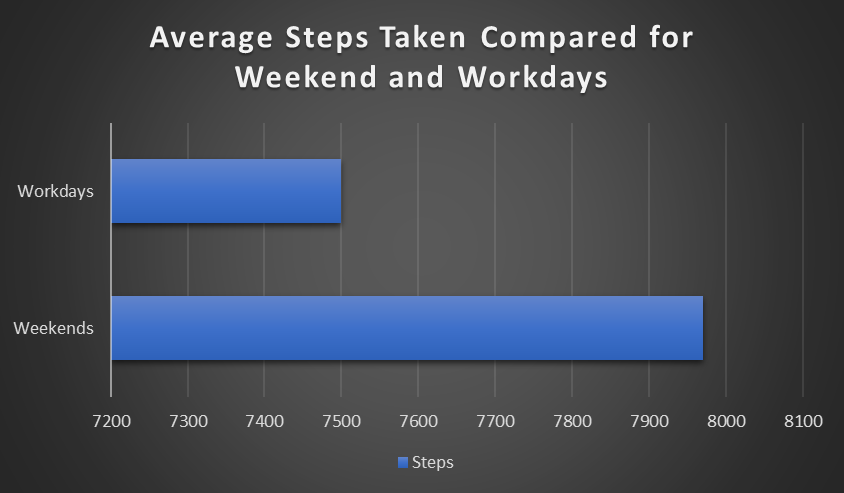


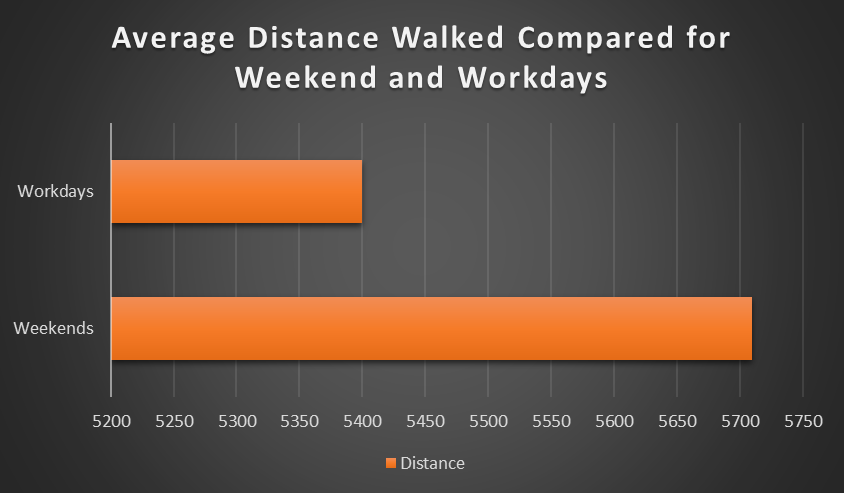

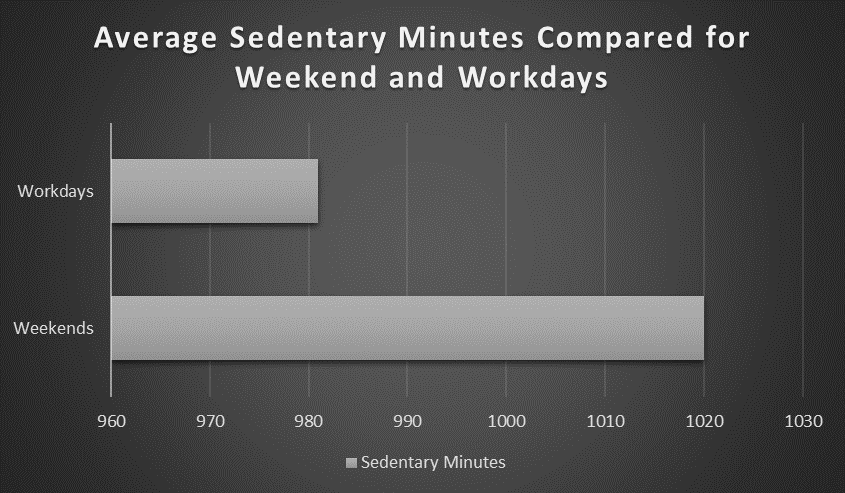

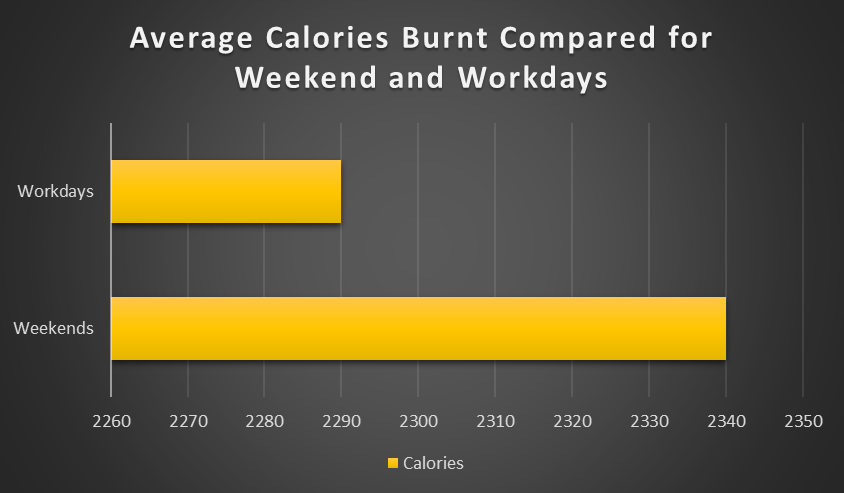

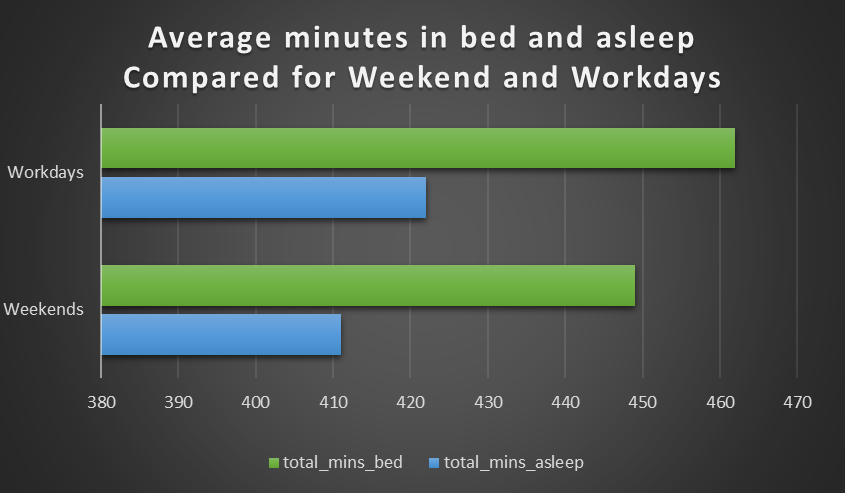

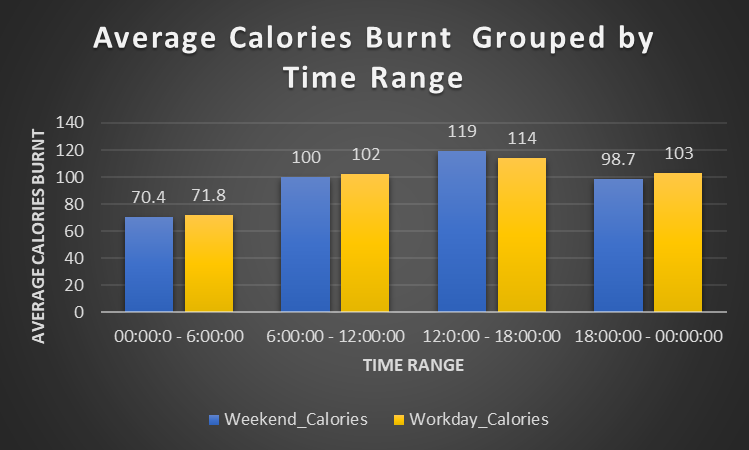

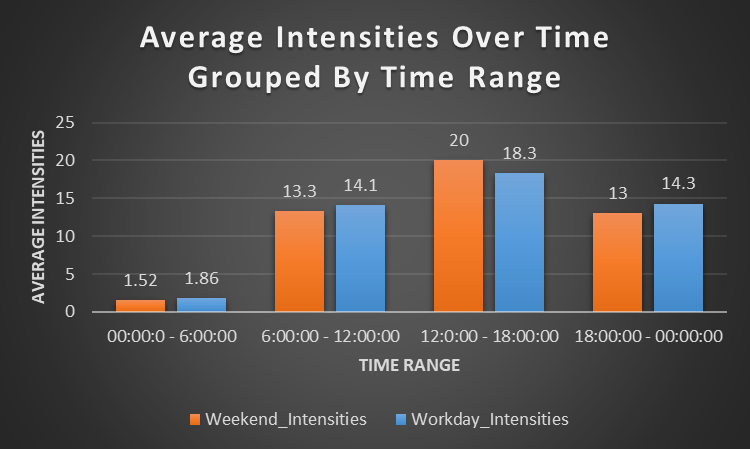

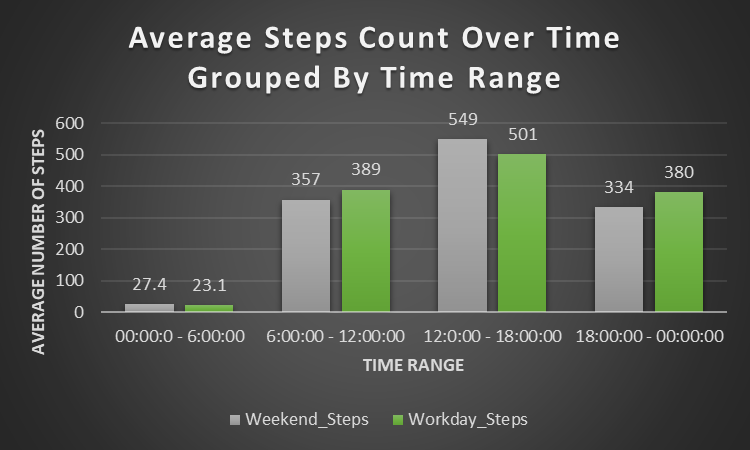

# Phase 6: Act

No analysis conclusion should remain to collect dust on a shelf! Rather some action should be taken. Taken the results and depending on the problem statement, recommendations for further actions can be made. And once the recommendations are ready, the actual decision can be made further incorporating the data driven decision making.
<br><br>
**How could your team and business apply your insights?**
<br>
Marketing and Promotions:<br> Utilize the knowledge that weekends are a time when people tend to be more focused on fitness and physical activity. This could inform marketing and promotional strategies, targeting specific fitness-related products or services during weekends to capitalize on the increased motivation and engagement.
<br><br>
Product Development:<br> Develop products or features that cater to the increased activity levels observed during the afternoon and evening hours. This could involve creating workout programs, fitness apps, or wearable devices that specifically target these peak activity times and provide users with tailored guidance and support.
<br><br>
Personalized Recommendations:<br> Leverage the understanding of users' activity patterns to offer personalized recommendations. For example, based on the analysis, if a user tends to be less active in the morning (q1), we could provide targeted reminders or incentives to encourage physical activity during that time period.
<br><br>
User Engagement Strategies:<br> Develop engagement strategies that align with the observed patterns. For instance, if there is a dip in activity during the early morning hours (q1), we could design challenges, competitions, or social features to motivate users to be more active during that time and create a sense of community around early morning fitness routines.
<br><br>
Business Operations:<br> Consider the insights related to sedentary behavior on weekends and explore opportunities to offer services or products that cater to leisure activities or relaxation during those times. This could involve partnering with wellness spas, organizing wellness retreats, or offering relaxation-focused classes or experiences.
